In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)

    num_points = loaded['num_train_points']

    metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['mean_absolute_error'],
        'max_error': loaded['baseline']['max_error'],
        'mse': loaded['baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [10]:
compiled_grouped_res = compiled_res.groupby([ 'num_train_points']).agg(['mean', 'std', 'count'])

In [11]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [12]:
compiled_grouped_res

mae                 max_error                  \
                      mean       std count      mean       std count   
num_train_points                                                       
10                2.653250  0.131857     4  8.680000  0.817843     4   
20                2.673467  0.216208     3  9.003333  0.802143     3   
50                2.499370  0.069424     4  8.157500  0.648813     4   
100               1.837480  0.402973     3  6.020000  1.372734     3   
200               0.825987  0.053361     3  4.146667  0.505206     3   
500               0.638420  0.031311     2  3.065000  0.502046     2   

                        mse                  
                       mean       std count  
num_train_points                             
10                10.411285  1.043155     4  
20                10.931237  1.609100     3  
50                 9.313259  0.339615     4  
100                5.332481  2.176965     3  
200                1.161951  0.173835     3  
500                0.648782  0.030257     2

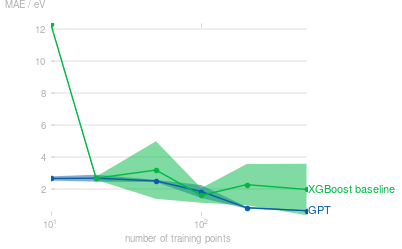

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)

    ax.plot(
        compiled_grouped_res.loc[:].index, 
        compiled_grouped_res.loc[:]['mae']['mean'], 
        label='GPT', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc[ :].index, 
        compiled_grouped_res.loc[ :]['mae']['mean'] - compiled_grouped_res.loc[:]['mae']['std'], 
        compiled_grouped_res.loc[ :]['mae']['mean'] + compiled_grouped_res.loc[:]['mae']['std'], 
          alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='XGBoost baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    ax.set_xscale('log')

fig.savefig('polymer_regression_res.pdf', bbox_inches='tight')
